# What does data look like

## What libraries should I import?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## How to read data?
Dummy data for the following exercises is provided [here](https://ruhr-uni-bochum.sciebo.de/s/Svwxncw01Ir9uxw).

In [2]:
file = '/Users/guillermo/Downloads/pose-3d.csv'


In [3]:
data = pd.read_csv(file, header=0)


## How is my data structured?

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Columns: 139 entries, lefteye1_x to fnum
dtypes: float64(138), int64(1)
memory usage: 488.8 KB


In [5]:
np.shape(data)


(450, 139)

In [6]:
data


,lefteye1_x,lefteye1_y,lefteye1_z,lefteye1_error,lefteye1_ncams,lefteye1_score,lefteye2_x,lefteye2_y,lefteye2_z,lefteye2_error,...,M_10,M_11,M_12,M_20,M_21,M_22,center_0,center_1,center_2,fnum
0,-11.488100,-0.391982,-6.391103,1.938121,2.0,0.999995,14.093313,-1.432060,-1.898372,2.190833,...,0.025309,0.004592,0.999669,-0.155911,-0.987735,0.008484,136.712949,21.796899,59.925219,0
1,-11.563727,-0.248620,-6.538817,2.030270,2.0,0.999996,14.219575,-1.263471,-2.031282,1.935011,...,0.025309,0.004592,0.999669,-0.155911,-0.987735,0.008484,136.712949,21.796899,59.925219,1
2,-11.630087,-0.129231,-6.667193,1.802676,2.0,0.999997,14.361094,-1.127249,-2.146595,1.606363,...,0.025309,0.004592,0.999669,-0.155911,-0.987735,0.008484,136.712949,21.796899,59.925219,2
3,-11.666934,-0.057356,-6.765140,2.019693,2.0,0.999998,14.528884,-1.018296,-2.235377,1.527383,...,0.025309,0.004592,0.999669,-0.155911,-0.987735,0.008484,136.712949,21.796899,59.925219,3
4,-11.657633,-0.022595,-6.825935,2.186289,2.0,0.999998,14.727834,-0.916615,-2.290928,1.662191,...,0.025309,0.004592,0.999669,-0.155911,-0.987735,0.008484,136.712949,21.796899,59.925219,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,19.858564,-0.186870,3.376668,1.879663,2.0,1.000000,43.138611,-0.935498,6.239373,2.397886,...,0.025309,0.004592,0.999669,-0.155911,-0.987735,0.008484,136.712949,21.796899,59.925219,445
446,19.828282,-0.197882,3.399467,1.926345,2.0,1.000000,43.099870,-0.936545,6.289830,2.507487,...,0.025309,0.004592,0.999669,-0.155911,-0.987735,0.008484,136.712949,21.796899,59.925219,446
447,19.792748,-0.197968,3.419085,1.987387,2.0,1.000000,43.070633,-0.924082,6.339649,2.495454,...,0.025309,0.004592,0.999669,-0.155911,-0.987735,0.008484,136.712949,21.796899,59.925219,447
448,19.753271,-0.185416,3.436065,1.666125,2.0,1.000000,43.049360,-0.899445,6.388871,2.244805,...,0.025309,0.004592,0.999669,-0.155911,-0.987735,0.008484,136.712949,21.796899,59.925219,448


### Cleaning data

In [7]:
coords = data.loc[:, ~data.columns.str.contains(
    'score|error|ncams|fnum|center|M_')]


In [8]:
scores = data.loc[:, data.columns.str.contains('score')]


### Changing the data structure

In [9]:
# Let us transform the data to be centered around a reference point
centered_coords = coords.copy()
for i in range(centered_coords.shape[1]):
    if '_x' in centered_coords.columns[i]:
        centered_coords.loc[:, centered_coords.columns[i]] = centered_coords.loc[:,
                                                                                 centered_coords.columns[i]].subtract(coords.loc[:, "nose1_x"].values)
    elif '_y' in centered_coords.columns[i]:
        centered_coords.loc[:, centered_coords.columns[i]] = centered_coords.loc[:,
                                                                                 centered_coords.columns[i]].subtract(coords.loc[:, "nose1_y"].values)
    elif '_z' in centered_coords.columns[i]:
        centered_coords.loc[:, centered_coords.columns[i]] = centered_coords.loc[:,
                                                                                 centered_coords.columns[i]].subtract(coords.loc[:, "nose1_z"].values)
    else:
        pass


In [10]:
centered_coords


,lefteye1_x,lefteye1_y,lefteye1_z,lefteye2_x,lefteye2_y,lefteye2_z,righteye1_x,righteye1_y,righteye1_z,righteye2_x,...,lowlip_z,llip_x,llip_y,llip_z,rlip_x,rlip_y,rlip_z,chin_x,chin_y,chin_z
0,21.138248,0.149274,1.339277,46.719661,-0.890804,5.832008,-22.571980,-0.471520,-9.779492,-37.820867,...,-80.979542,37.796704,-0.980286,-67.807799,-10.351668,1.195690,-76.963349,19.029902,-0.445000,-115.416169
1,21.201282,0.213704,1.322499,46.984585,-0.801147,5.830035,-22.538740,-0.402639,-9.909138,-37.677083,...,-80.990478,37.855529,-0.946660,-67.868614,-10.338881,1.200735,-76.917438,19.053691,-0.440997,-115.518292
2,21.256664,0.240579,1.302346,47.247845,-0.757440,5.822944,-22.508311,-0.368747,-10.036418,-37.536744,...,-81.001777,37.907243,-0.940885,-67.933516,-10.330400,1.193681,-76.872875,19.065735,-0.449761,-115.618253
3,21.299285,0.240397,1.274168,47.495103,-0.720543,5.803931,-22.480971,-0.356541,-10.160358,-37.410751,...,-81.009722,37.937340,-0.950328,-68.005056,-10.330788,1.182822,-76.827400,19.055308,-0.460424,-115.710979
4,21.325677,0.220319,1.235597,47.711144,-0.673701,5.770603,-22.456571,-0.350904,-10.279109,-37.310866,...,-81.007437,37.939126,-0.940040,-68.081264,-10.349203,1.157687,-76.779312,19.016472,-0.470678,-115.789328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,23.060752,-0.199214,1.879664,46.340798,-0.947842,4.742368,-19.185499,1.345010,-6.506368,-41.953663,...,-71.425305,43.196517,-0.785810,-56.866667,-18.389502,1.428511,-66.358897,18.667268,0.086065,-118.640513
446,23.079261,-0.215957,1.892306,46.350848,-0.954620,4.782669,-19.195640,1.345283,-6.492639,-41.925121,...,-71.434948,43.233000,-0.798553,-56.874906,-18.308865,1.423512,-66.383337,18.711471,0.078809,-118.608907
447,23.092409,-0.221658,1.901226,46.370295,-0.947773,4.821791,-19.207953,1.350226,-6.479757,-41.894597,...,-71.446489,43.267756,-0.816412,-56.887243,-18.231429,1.421237,-66.409016,18.751617,0.062069,-118.578352
448,23.100727,-0.215898,1.907636,46.396815,-0.929927,4.860443,-19.222547,1.355703,-6.466862,-41.864912,...,-71.458910,43.300950,-0.836934,-56.901680,-18.156717,1.420305,-66.434610,18.788906,0.038433,-118.547809


In [11]:
# What is the difference between pandas Data Frame and numpy Array?
coords_egocentric = centered_coords.to_numpy()
coords_egocentric


array([[ 2.11382476e+01,  1.49273730e-01,  1.33927693e+00, ...,
         1.90299024e+01, -4.45000140e-01, -1.15416169e+02],
       [ 2.12012820e+01,  2.13704103e-01,  1.32249940e+00, ...,
         1.90536908e+01, -4.40996722e-01, -1.15518292e+02],
       [ 2.12566635e+01,  2.40579034e-01,  1.30234553e+00, ...,
         1.90657352e+01, -4.49760897e-01, -1.15618253e+02],
       ...,
       [ 2.30924089e+01, -2.21658316e-01,  1.90122647e+00, ...,
         1.87516173e+01,  6.20694224e-02, -1.18578352e+02],
       [ 2.31007267e+01, -2.15897713e-01,  1.90763642e+00, ...,
         1.87889064e+01,  3.84331742e-02, -1.18547809e+02],
       [ 2.31073256e+01, -2.07480062e-01,  1.91417434e+00, ...,
         1.88254245e+01,  1.48810149e-02, -1.18516762e+02]])

## Reading DeepLabCut Data
Note that DeepLabCut files contain multiple headers

In [12]:
# .h5 vs csv with multiple headings
file = '/Users/guillermo/Downloads/DLC_data.csv'
data = pd.read_csv(file, header=0)
data


/Users/guillermo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,scorer,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.1,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.2,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.3,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.4,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.5,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.6,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.7,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.8,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.9,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.10,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.11,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.12,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.13,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.14,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.15,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.16,DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000.17
0,bodyparts,tophead,tophead,tophead,neckbase,neckbase,neckbase,tailend,tailend,tailend,wingbowleft,wingbowleft,wingbowleft,wingbowright,wingbowright,wingbowright,backcenter,backcenter,backcenter
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,736.8365478515625,440.2051086425781,0.9999855756759644,736.7742309570312,521.3764038085938,0.9882965683937073,855.1517944335938,502.51654052734375,0.9929274916648865,722.4508666992188,638.5551147460938,0.9817160964012146,848.135498046875,725.8486328125,0.5518141388893127,779.173828125,637.4671020507812,0.9575235247612
3,1,736.6965732465003,439.96420420329684,0.9999710321426392,736.6901676790957,521.3737120583947,0.9984785914421082,854.1960618426,497.6001401711765,0.041485220193862915,717.9101631977412,636.903006227701,0.9891084432601929,843.8478180157791,722.9210467101142,0.8639070987701416,777.0301382784822,636.5131135081384,0.9471402168273926
4,2,735.7040493627546,436.7637389370659,0.999962568283081,736.6576001497499,520.317367317496,0.9994844198226929,855.3453658338591,630.6766258156872,0.0038163603749126196,718.9731625027971,637.8714981367024,0.9381800889968872,709.894219318126,604.0449981131718,0.14082202315330505,777.3939321502603,636.2873536219506,0.9269355535507202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71921,71919,816.685736,394.333402,0.996886,747.200637,430.753285,0.99992,575.128539,563.851408,0.999976,756.409661,354.888011,0.999997,816.141309,446.039971,0.999989,672.113405,479.530765,0.999961
71922,71920,816.844076,394.197315,0.993028,747.467628,430.599931,0.999918,575.047661,564.093645,0.999984,756.498965,354.752492,0.999998,816.132225,445.987682,0.999973,672.046608,479.611423,0.999972
71923,71921,816.824561,393.841141,0.991949,747.3541,430.614478,0.999922,575.211231,564.088919,0.999988,756.520165,354.817808,0.999998,815.87947,446.139886,0.99998,672.175552,479.673533,0.999959
71924,71922,816.406188,393.766398,0.992734,747.626257,430.654457,0.999948,575.462232,564.156158,0.999987,756.487524,354.854141,0.999997,815.797104,446.552003,0.999989,672.213608,479.578535,0.999954


You can specify multiple headers in `pd.read_csv(file, header=[0,1,2])`, but your data frame will be a little more difficult to subset, as columns will be a MultiIndex array.

In [13]:
data = pd.read_csv(file, header=[0, 1, 2])
data


scorer DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000  \
      bodyparts                                                tophead   
         coords                                                      x   
0             0                                         736.836548       
1             1                                         736.696573       
2             2                                         735.704049       
3             3                                         734.293249       
4             4                                         732.744517       
...         ...                                                ...       
71919     71919                                         816.685736       
71920     71920                                         816.844076       
71921     71921                                         816.824561       
71922     71922                                         816.406188       
71923     71923                                         816.119821       

                                                                             \
                                neckbase                            tailend   
                y likelihood           x           y likelihood           x   
0      440.205109   0.999986  736.774231  521.376404   0.988297  855.151794   
1      439.964204   0.999971  736.690168  521.373712   0.998479  854.196062   
2      436.763739   0.999963  736.657600  520.317367   0.999484  855.345366   
3      431.819332   0.999991  735.908934  517.310811   0.998731  827.010097   
4      426.053270   0.999990  735.196591  513.924565   0.999366  791.315112   
...           ...        ...         ...         ...        ...         ...   
71919  394.333402   0.996886  747.200637  430.753285   0.999920  575.128539   
71920  394.197315   0.993028  747.467628  430.599931   0.999918  575.047661   
71921  393.841141   0.991949  747.354100  430.614478   0.999922  575.211231   
71922  393.766398   0.992734  747.626257  430.654457   0.999948  575.462232   
71923  393.876178   0.993627  747.240035  430.915333   0.999949  575.500692   

                                                                              \
                             wingbowleft                        wingbowright   
                y likelihood           x           y likelihood            x   
0      502.516541   0.992927  722.450867  638.555115   0.981716   848.135498   
1      497.600140   0.041485  717.910163  636.903006   0.989108   843.847818   
2      630.676626   0.003816  718.973163  637.871498   0.938180   709.894219   
3      675.563420   0.004858  721.308479  640.070535   0.857882   796.094113   
4      546.063109   0.032099  723.677384  638.630865   0.999613   811.859656   
...           ...        ...         ...         ...        ...          ...   
71919  563.851408   0.999976  756.409661  354.888011   0.999997   816.141309   
71920  564.093645   0.999984  756.498965  354.752492   0.999998   816.132225   
71921  564.088919   0.999988  756.520165  354.817808   0.999998   815.879470   
71922  564.156158   0.999987  756.487524  354.854141   0.999997   815.797104   
71923  563.874192   0.999987  756.474672  354.848543   0.999998   815.629617   

                                                                 
                              backcenter                         
                y likelihood           x           y likelihood  
0      725.848633   0.551814  779.173828  637.467102   0.957524  
1      722.921047   0.863907  777.030138  636.513114   0.947140  
2      604.044998   0.140822  777.393932  636.287354   0.926936  
3      682.185972   0.460554  777.985463  635.496588   0.972686  
4      696.591080   0.586390  779.552232  633.139890   0.991626  
...           ...        ...         ...         ...        ...  
71919  446.039971   0.999989  672.113405  479.530765   0.999961  
71920  445.987682   0.999973  672.046608  479.611423   0.999972  
71921  446.139886 

In [14]:
data.columns


MultiIndex([(                                                'scorer', ...),
            ('DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000', ...),
            ('DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000', ...),
            ('DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000', ...),
            ('DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000', ...),
            ('DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000', ...),
            ('DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000', ...),
            ('DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000', ...),
            ('DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000', ...),
            ('DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000', ...),
            ('DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000', ...),
            ('DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000', ...),
            ('DLC_resnet50_Picky_Pigeon_ProjectDec17shuffle1_1030000', ...),

In [15]:
data.columns.get_level_values(1)


Index(['bodyparts', 'tophead', 'tophead', 'tophead', 'neckbase', 'neckbase',
       'neckbase', 'tailend', 'tailend', 'tailend', 'wingbowleft',
       'wingbowleft', 'wingbowleft', 'wingbowright', 'wingbowright',
       'wingbowright', 'backcenter', 'backcenter', 'backcenter'],
      dtype='object')

In [16]:
data.columns.get_level_values(2)


Index(['coords', 'x', 'y', 'likelihood', 'x', 'y', 'likelihood', 'x', 'y',
       'likelihood', 'x', 'y', 'likelihood', 'x', 'y', 'likelihood', 'x', 'y',
       'likelihood'],
      dtype='object')

Better rename the columns of your data frame to avoid MultiIndex

In [17]:
data.columns.get_level_values(1) + '_' + data.columns.get_level_values(1)


Index(['bodyparts_bodyparts', 'tophead_tophead', 'tophead_tophead',
       'tophead_tophead', 'neckbase_neckbase', 'neckbase_neckbase',
       'neckbase_neckbase', 'tailend_tailend', 'tailend_tailend',
       'tailend_tailend', 'wingbowleft_wingbowleft', 'wingbowleft_wingbowleft',
       'wingbowleft_wingbowleft', 'wingbowright_wingbowright',
       'wingbowright_wingbowright', 'wingbowright_wingbowright',
       'backcenter_backcenter', 'backcenter_backcenter',
       'backcenter_backcenter'],
      dtype='object')

In [18]:
new_col_names = list(data.columns.get_level_values(
    1) + '_' + data.columns.get_level_values(2))
data.columns = new_col_names
data


,bodyparts_coords,tophead_x,tophead_y,tophead_likelihood,neckbase_x,neckbase_y,neckbase_likelihood,tailend_x,tailend_y,tailend_likelihood,wingbowleft_x,wingbowleft_y,wingbowleft_likelihood,wingbowright_x,wingbowright_y,wingbowright_likelihood,backcenter_x,backcenter_y,backcenter_likelihood
0,0,736.836548,440.205109,0.999986,736.774231,521.376404,0.988297,855.151794,502.516541,0.992927,722.450867,638.555115,0.981716,848.135498,725.848633,0.551814,779.173828,637.467102,0.957524
1,1,736.696573,439.964204,0.999971,736.690168,521.373712,0.998479,854.196062,497.600140,0.041485,717.910163,636.903006,0.989108,843.847818,722.921047,0.863907,777.030138,636.513114,0.947140
2,2,735.704049,436.763739,0.999963,736.657600,520.317367,0.999484,855.345366,630.676626,0.003816,718.973163,637.871498,0.938180,709.894219,604.044998,0.140822,777.393932,636.287354,0.926936
3,3,734.293249,431.819332,0.999991,735.908934,517.310811,0.998731,827.010097,675.563420,0.004858,721.308479,640.070535,0.857882,796.094113,682.185972,0.460554,777.985463,635.496588,0.972686
4,4,732.744517,426.053270,0.999990,735.196591,513.924565,0.999366,791.315112,546.063109,0.032099,723.677384,638.630865,0.999613,811.859656,696.591080,0.586390,779.552232,633.139890,0.991626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71919,71919,816.685736,394.333402,0.996886,747.200637,430.753285,0.999920,575.128539,563.851408,0.999976,756.409661,354.888011,0.999997,816.141309,446.039971,0.999989,672.113405,479.530765,0.999961
71920,71920,816.844076,394.197315,0.993028,747.467628,430.599931,0.999918,575.047661,564.093645,0.999984,756.498965,354.752492,0.999998,816.132225,445.987682,0.999973,672.046608,479.611423,0.999972
71921,71921,816.824561,393.841141,0.991949,747.354100,430.614478,0.999922,575.211231,564.088919,0.999988,756.520165,354.817808,0.999998,815.879470,446.139886,0.999980,672.175552,479.673533,0.999959
71922,71922,816.406188,393.766398,0.992734,747.626257,430.654457,0.999948,575.462232,564.156158,0.999987,756.487524,354.854141,0.999997,815.797104,446.552003,0.999989,672.213608,479.578535,0.999954


## What does my data tell me?

In [19]:
# Does this make sense?
coords.mean(axis='columns')


0     -19.892839
1     -19.914494
2     -19.930776
3     -19.937752
4     -19.923985
         ...    
445    -6.321469
446    -6.313084
447    -6.304621
448    -6.296241
449    -6.288533
Length: 450, dtype: float64

In [20]:
# What about this?
coords.mean(axis='index')


lefteye1_x     18.106572
lefteye1_y     -0.019333
lefteye1_z      0.796235
lefteye2_x     43.672666
lefteye2_y     -0.645574
                 ...    
rlip_y          0.996420
rlip_z        -74.329763
chin_x         17.394544
chin_y         -0.286453
chin_z       -118.842049
Length: 63, dtype: float64

In [21]:
coords['lefteye1_x'].mean()


18.10657168922479

In [22]:
coords.describe()


,lefteye1_x,lefteye1_y,lefteye1_z,lefteye2_x,lefteye2_y,lefteye2_z,righteye1_x,righteye1_y,righteye1_z,righteye2_x,...,lowlip_z,llip_x,llip_y,llip_z,rlip_x,rlip_y,rlip_z,chin_x,chin_y,chin_z
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,18.106572,-0.019333,0.796235,43.672666,-0.645574,5.586992,-21.632261,1.278443,-6.218734,-44.885085,...,-77.892073,36.387709,-0.794339,-65.950381,-14.813016,0.996420,-74.329763,17.394544,-0.286453,-118.842049
std,11.434284,0.599469,3.828957,11.505354,0.705344,4.144886,12.124253,0.803002,4.433668,11.226158,...,6.383489,12.088332,0.708887,5.909938,12.327903,0.705005,5.116139,11.669450,0.823316,3.496960
min,-18.098617,-1.145164,-6.844781,5.858257,-1.948370,-2.307151,-57.526330,-1.012775,-18.430021,-81.767449,...,-89.068969,0.151487,-2.103737,-76.193362,-50.004844,-0.675003,-84.866708,-17.538646,-1.985098,-125.301249
25%,18.225435,-0.612380,-2.954008,43.193416,-1.344781,2.123240,-22.683956,0.584199,-10.600334,-45.410591,...,-83.604016,33.761567,-1.246099,-70.754029,-16.660826,0.725735,-78.226643,15.961120,-1.119348,-121.885470
50%,19.861041,-0.047041,0.653475,46.836783,-0.575274,5.330278,-18.695114,1.352917,-6.413949,-42.622488,...,-77.400903,39.924777,-0.819950,-67.125851,-12.696178,1.048074,-74.785135,18.953581,-0.140253,-117.925277
75%,24.614006,0.572676,3.737492,48.943208,-0.011691,8.761392,-15.253385,1.890220,-3.227924,-39.535513,...,-72.539818,43.852962,-0.265885,-63.012012,-10.172126,1.509309,-71.510924,24.541857,0.266672,-115.933453
max,34.449984,0.968391,8.652052,60.024778,0.420347,14.328102,-5.669487,2.681084,2.781161,-28.287430,...,-64.906500,53.732858,0.461475,-54.243952,8.041773,2.103936,-63.094976,34.490673,0.977069,-111.792641


## How could my data look like

array([[<AxesSubplot:title={'center':'lefteye1_score'}>,
        <AxesSubplot:title={'center':'lefteye2_score'}>,
        <AxesSubplot:title={'center':'righteye1_score'}>,
        <AxesSubplot:title={'center':'righteye2_score'}>,
        <AxesSubplot:title={'center':'leyebrow1_score'}>],
       [<AxesSubplot:title={'center':'leyebrow2_score'}>,
        <AxesSubplot:title={'center':'leyebrow3_score'}>,
        <AxesSubplot:title={'center':'reyebrow1_score'}>,
        <AxesSubplot:title={'center':'reyebrow2_score'}>,
        <AxesSubplot:title={'center':'reyebrow3_score'}>],
       [<AxesSubplot:title={'center':'lear_score'}>,
        <AxesSubplot:title={'center':'rear_score'}>,
        <AxesSubplot:title={'center':'nose1_score'}>,
        <AxesSubplot:title={'center':'nose2_score'}>,
        <AxesSubplot:title={'center':'nose3_score'}>],
       [<AxesSubplot:title={'center':'nose4_score'}>,
        <AxesSubplot:title={'center':'uplip_score'}>,
        <AxesSubplot:title={'center':'lowli

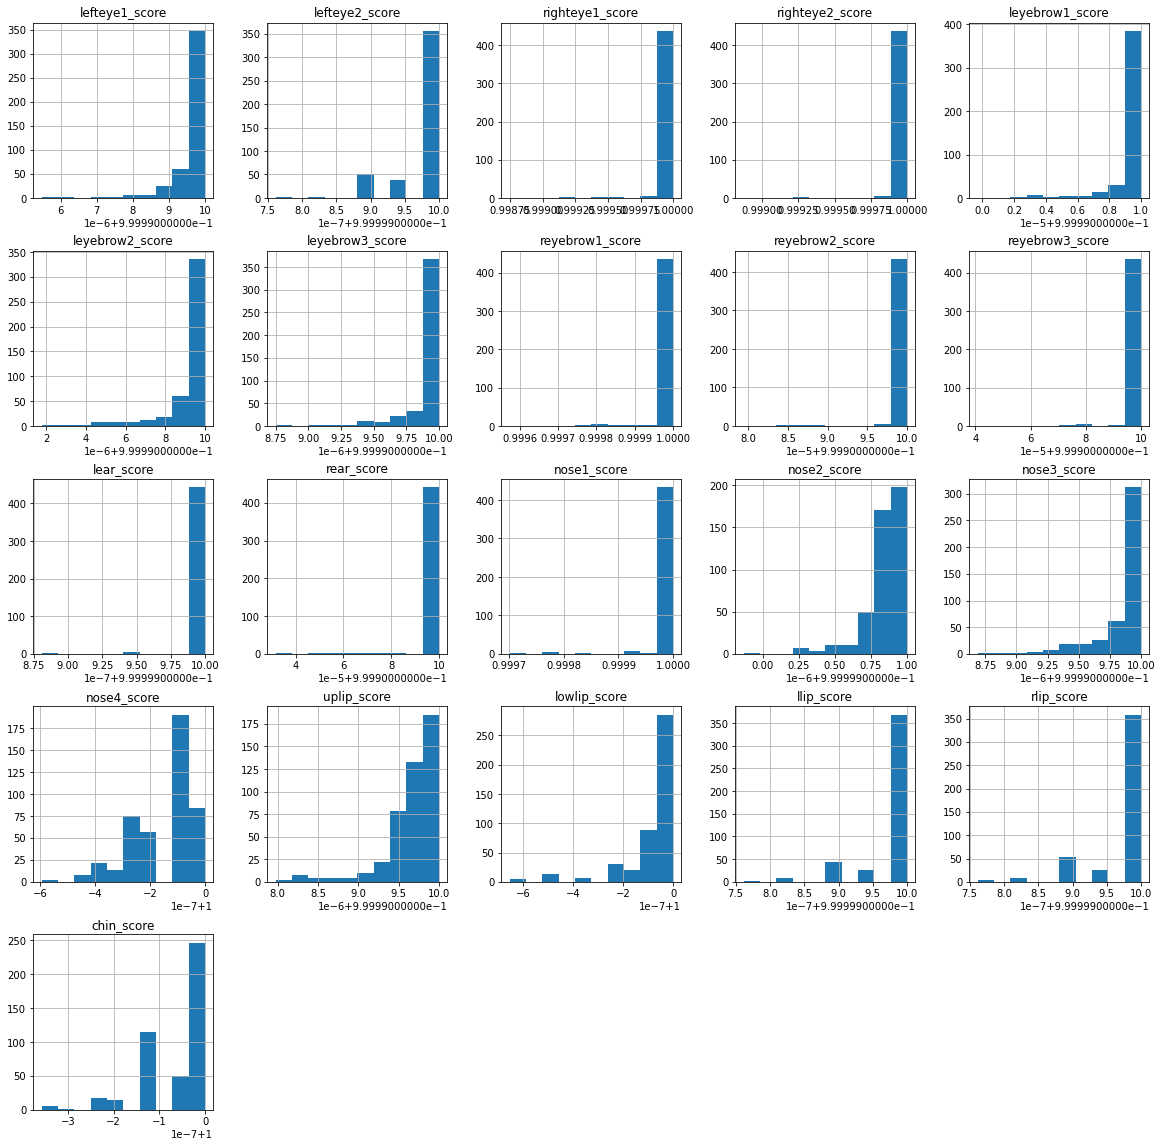

In [23]:
scores.hist(figsize=(20, 20))


<AxesSubplot:>

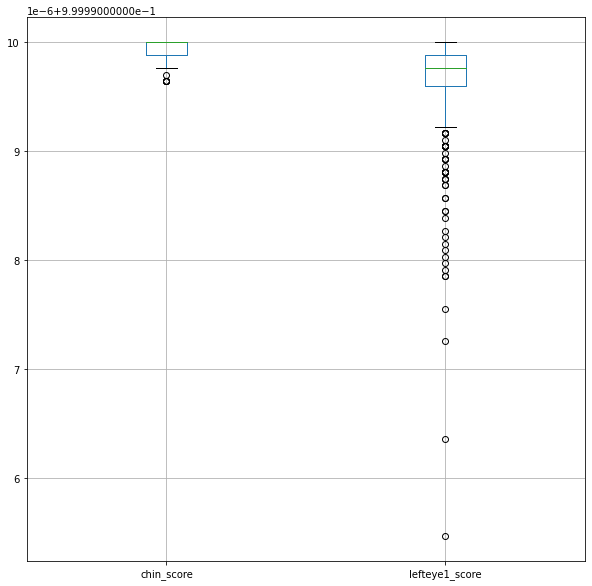

In [24]:
scores.boxplot(column=['chin_score', 'lefteye1_score'], figsize=(10, 10))


Text(0.5, 0.92, 'My First Plot')

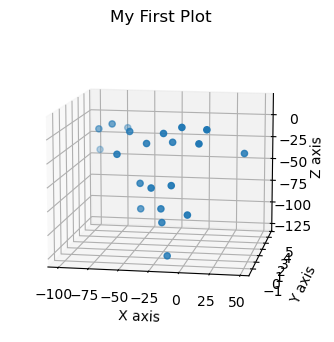

In [25]:
x_coords = coords.loc[:, coords.columns.str.contains('_x')]
y_coords = coords.loc[:, coords.columns.str.contains('_y')]
z_coords = coords.loc[:, coords.columns.str.contains('_z')]

t = 0

fig = plt.figure(figsize=(6, 4), dpi=100)
ax = fig.add_subplot(projection='3d')
x_points = x_coords[t:t+1]
y_points = y_coords[t:t+1]
z_points = z_coords[t:t+1]

ax.scatter3D(x_points, y_points, z_points)
ax.view_init(11, 280)
ax.set(xlabel='X axis', ylabel='Y axis', zlabel='Z axis')

plt.title("My First Plot")


In the following section we will learn to calculate some easy kinematic features to better understand our data.

## Bonus

In [26]:
def face_skeleton(pose):
    """
    The face_skeleton function defines a mesh skeleton by connecting the facial landmarks as defined below.
    This function is directly passed to plot_3Dpose. 
    """
    skeletons = []
    for n in range(len(pose)):  # read out n_components from different poses

        lefteye = [pose[n]['lefteye1_x'], pose[n]['lefteye2_x']], [
            pose[n]['lefteye1_y'], pose[n]['lefteye2_y']], [pose[n]['lefteye1_z'], pose[n]['lefteye2_z']]
        righteye = [pose[n]['righteye1_x'], pose[n]['righteye2_x']], [
            pose[n]['righteye1_y'], pose[n]['righteye2_y']], [pose[n]['righteye1_z'], pose[n]['righteye2_z']]
        leyebrow = [pose[n]['leyebrow1_x'], pose[n]['leyebrow2_x'], pose[n]['leyebrow3_x']], [pose[n]['leyebrow1_y'], pose[n]
                                                                                              ['leyebrow2_y'], pose[n]['leyebrow3_y']], [pose[n]['leyebrow1_z'], pose[n]['leyebrow2_z'], pose[n]['leyebrow3_z']]
        reyebrow = [pose[n]['reyebrow1_x'], pose[n]['reyebrow2_x'], pose[n]['reyebrow3_x']], [pose[n]['reyebrow1_y'], pose[n]
                                                                                              ['reyebrow2_y'], pose[n]['reyebrow3_y']], [pose[n]['reyebrow1_z'], pose[n]['reyebrow2_z'], pose[n]['reyebrow3_z']]
        nose = [pose[n]['nose1_x'], pose[n]['nose3_x'], pose[n]['nose2_x'], pose[n]['nose4_x'], pose[n]['nose1_x']], [pose[n]['nose1_y'], pose[n]['nose3_y'], pose[n]
                                                                                                                      ['nose2_y'], pose[n]['nose4_y'], pose[n]['nose1_y']], [pose[n]['nose1_z'], pose[n]['nose3_z'], pose[n]['nose2_z'], pose[n]['nose4_z'], pose[n]['nose1_z']]
        lips = [pose[n]['uplip_x'], pose[n]['llip_x'], pose[n]['lowlip_x'], pose[n]['rlip_x'], pose[n]['uplip_x']], [pose[n]['uplip_y'], pose[n]['llip_y'], pose[n]
                                                                                                                     ['lowlip_y'], pose[n]['rlip_y'], pose[n]['uplip_y']], [pose[n]['uplip_z'], pose[n]['llip_z'], pose[n]['lowlip_z'], pose[n]['rlip_z'], pose[n]['uplip_z']]
        face = [pose[n]['rear_x'], pose[n]['chin_x'], pose[n]['lear_x']], [pose[n]['rear_y'], pose[n]
                                                                           ['chin_y'], pose[n]['lear_y']], [pose[n]['rear_z'], pose[n]['chin_z'], pose[n]['lear_z']]

        skeleton = lefteye, righteye, leyebrow, reyebrow, nose, lips, face
        skeletons.append(skeleton)

    return skeletons


def plot_3Dpose(pose, elevation, azimuth):
    """
    This plot function takes the average pose coordinates of facial landmarks, creates a skeleton and visualizes the facial expression
    in a 3D coordinate system with predefined elevantion and azimuth angles.
    """
    skeletons = face_skeleton(pose)

    ncols = 3
    nrows = math.ceil(len(pose)/ncols)
    width = ncols*6
    height = nrows * 5

    fig, axes = plt.subplots(nrows, ncols, figsize=(
        width, height), subplot_kw=dict(projection='3d'))

    for ax, n in zip(axes.flat, range(len(pose))):
        x_points = pose[n][['_x' in s for s in pose[n].index]]
        y_points = pose[n][['_y' in s for s in pose[n].index]]
        z_points = pose[n][['_z' in s for s in pose[n].index]]
        ax.scatter3D(x_points, y_points, z_points)
        ax.view_init(elevation, azimuth)
        ax.set(xlabel='X axis', ylabel='Y axis', zlabel='Z axis')
        ax.set_title('Predicted Pose: %d' % (n+1))
        for i in range(len(skeletons[0])):
            x = skeletons[n][i][0]
            y = skeletons[n][i][1]
            z = skeletons[n][i][2]
            ax.plot(x, y, z, color='g')

    plt.suptitle(
        'Hidden Markov Model predictions with N = %d Components' % len(pose))
    plt.show()
    return


def split_data(data, prediction):
    """
    The split_data function will be used to split time series data into smaller 
    chunks by the prediction variable.

    """
    n = max(prediction)+1  # read out the number of predicted components
    data['pred'] = prediction
    grouped = data.groupby(data.pred)
    predictions = [grouped.get_group(i) for i in range(n)]
    pose = [predictions[i].mean() for i in range(n)]

    return predictions, pose


In [27]:
from hmmlearn import hmm
import math
# change the number of components you expect to find in your data
model1 = hmm.GaussianHMM(n_components=9, covariance_type="full")
model1.fit(coords)
pred1 = model1.predict(coords)


In [28]:
_, pose1 = split_data(centered_coords, pred1)


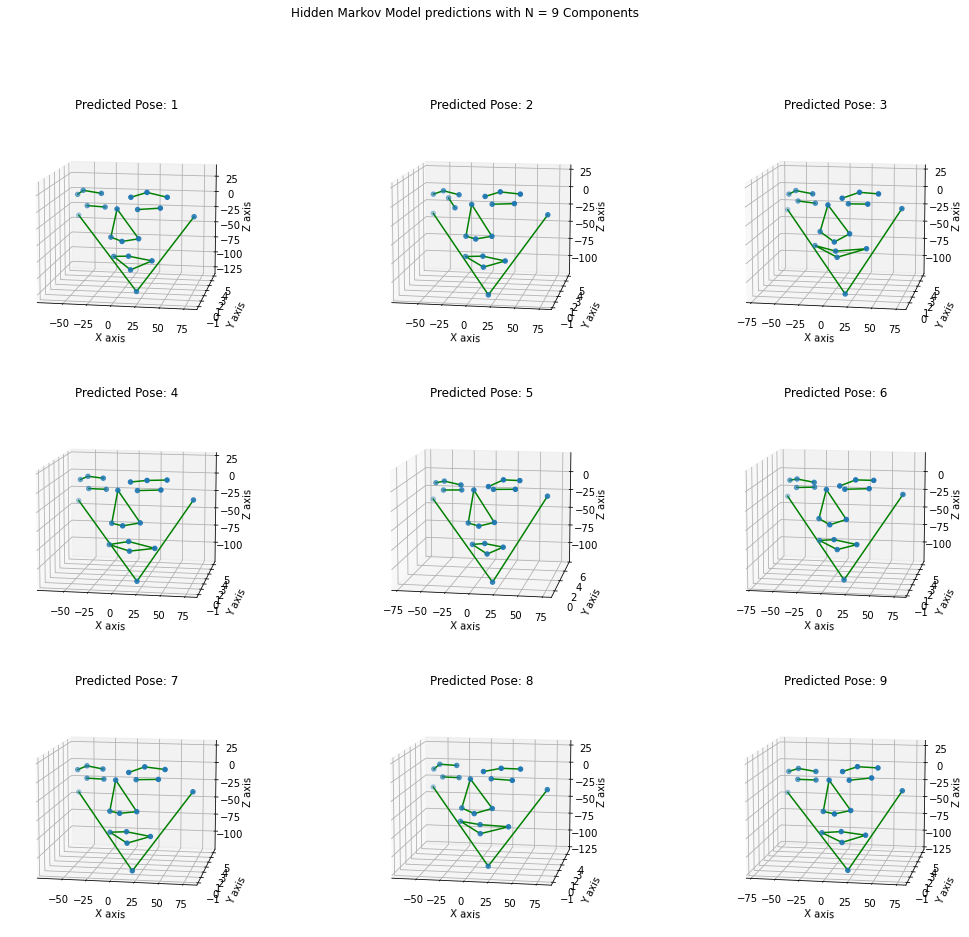

In [29]:
plot_3Dpose(pose1, 11, 280)
